# **THE PROMOTION PARADOX:**
### *Fixing Biased Talent Promotion Decisions Through Data-Driven HR Analytics*

**Final project by Syntax Society**
- Bayu Maitra
- Dian Ulhaq
- Febiansyah Ahnaf
- Keisya Nisrina Aulia
- Maslahatul Husna

# **IMPORT TOOLS & LOAD DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numpy==1.26.4

In [ ]:
pip install scikit-learn-extra

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=1963618 sha256=354e9252f935db7befed7bb41122f8fa78c852fa7746a59ffad990a2ff25c1c6
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
df_scaled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/dataset_clean_scaled.csv')

In [ ]:
df_scaled.head()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,-0.701018,-0.220184,-1.035977,1.627892,0.349011,0.0,0.172393,0.499204,-0.805039,0.260405,-0.175344,0.357239
1,1.465699,-0.184340,-0.610027,0.178266,-1.591787,0.0,-1.443855,-1.437583,-1.281323,-0.135183,-0.363274,1.096978
2,1.465699,-1.116279,-0.077591,-0.727750,1.231192,0.0,0.420284,1.245916,0.233415,-0.280955,0.276325,0.009126
3,0.743460,0.030723,-1.497422,-0.727750,0.031426,0.0,0.043490,-0.002494,-1.296939,0.133730,-0.229885,-0.251958
4,0.743460,0.496693,-0.769758,1.084282,0.278437,0.0,0.509525,0.475869,-0.445875,0.023922,-0.244045,1.488605


## **Drop target**

In [ ]:
df_scaled = df_scaled.drop(columns=['Promotion_Eligible'])

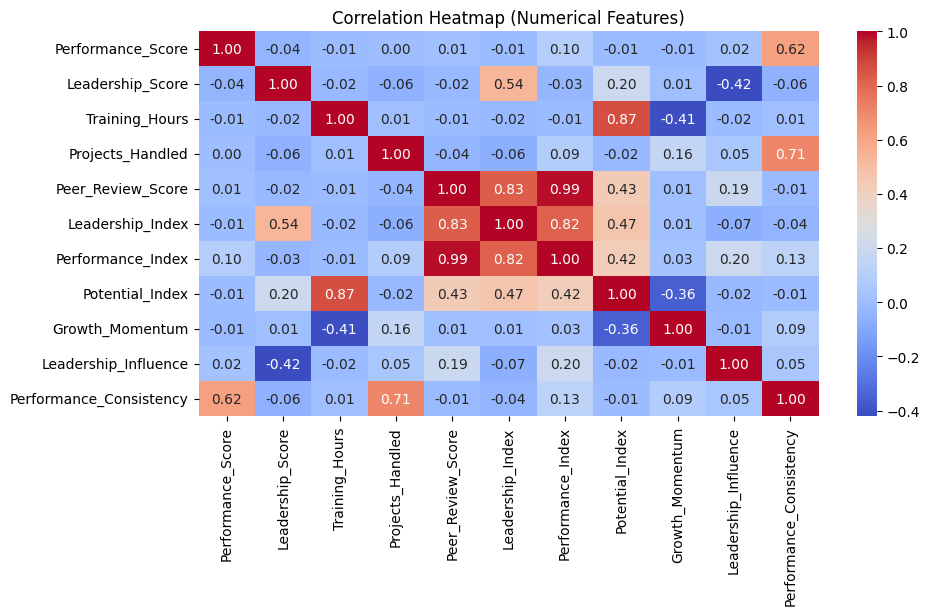

In [ ]:
num_cols = df_scaled.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 5))
sns.heatmap(df_scaled[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# **UNSUPERVISED LEARNING**

## **K-means**

###  **All features**

#### **Elbow method**

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

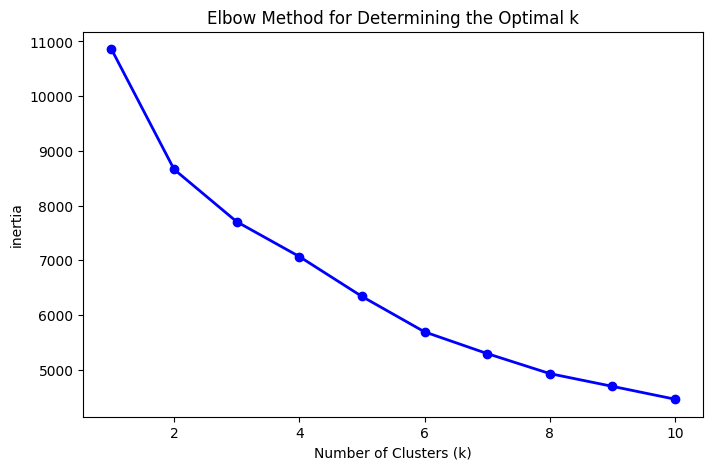

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for Determining the Optimal k')
plt.show()


#### **silhouette_score and davies_bouldin_score**

In [ ]:
X = df_scaled.values

In [ ]:
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    results.append([k, sil, dbi])

df_results1 = pd.DataFrame(results, columns=['k', 'Silhouette', 'DBI'])
print(df_results1)

    k  Silhouette       DBI
0   2    0.202028  1.828185
1   3    0.187135  1.834187
2   4    0.194977  1.521013
3   5    0.197892  1.334550
4   6    0.182993  1.360843
5   7    0.170787  1.433211
6   8    0.165625  1.396923
7   9    0.167619  1.365354
8  10    0.169514  1.365004


In [ ]:
best_sil_k = df_results1.loc[df_results1['Silhouette'].idxmax(), 'k']
best_dbi_k = df_results1.loc[df_results1['DBI'].idxmin(), 'k']

print("The best K according to Silhouette =", best_sil_k)
print("The best K according to DBI        =", best_dbi_k)

The best K according to Silhouette = 2
The best K according to DBI        = 5


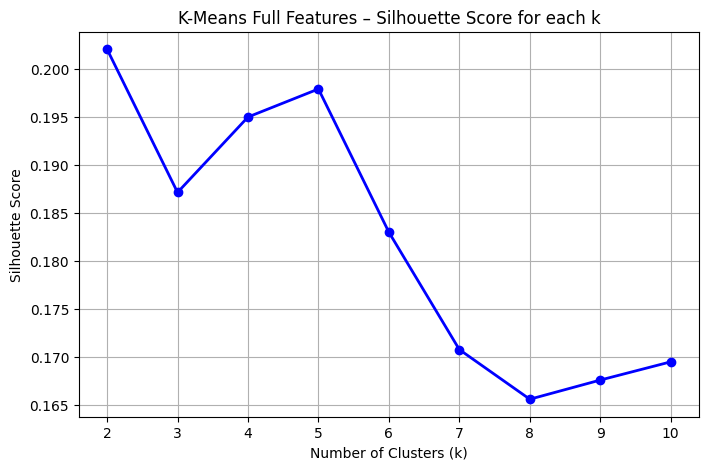

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_results1["k"], df_results1["Silhouette"], 'bo-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Full Features – Silhouette Score for each k")
plt.grid(True)
plt.show()

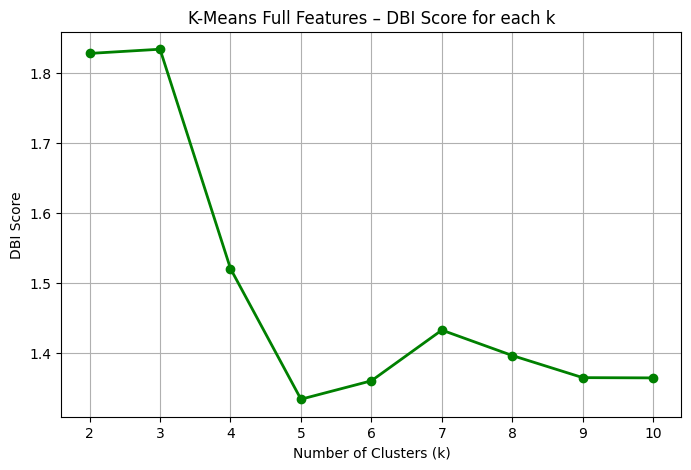

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_results1["k"], df_results1["DBI"], 'go-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DBI Score")
plt.title("K-Means Full Features – DBI Score for each k")
plt.grid(True)
plt.show()

#### **Visualization k = 4**

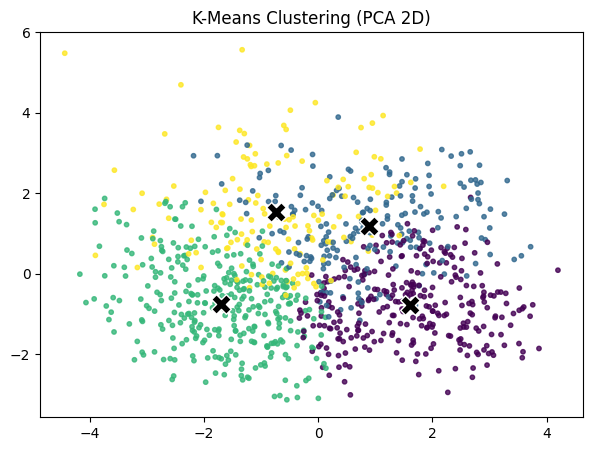

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# 1. Fit PCA to data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. Transform centroids to PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 3. Plot data + centroids
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title("K-Means Clustering (PCA 2D)")
plt.show()

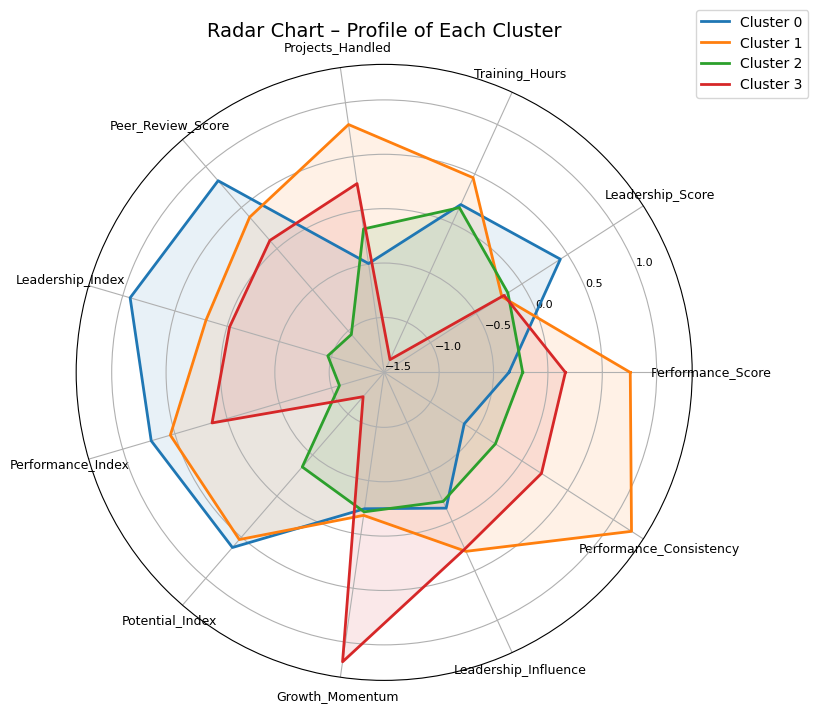

In [ ]:
df_cluster = df_scaled.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature per cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile of Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

#### **Visualization k = 5**

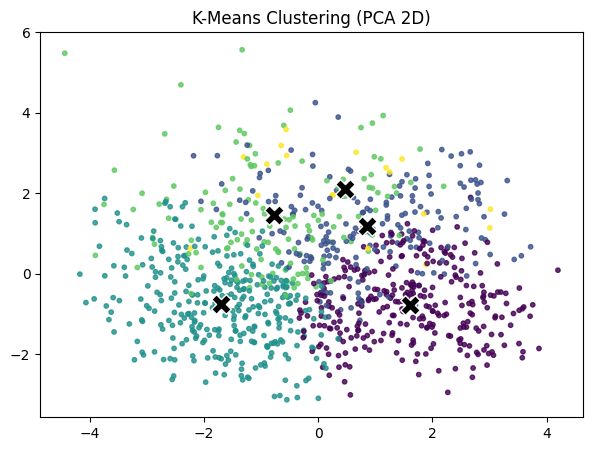

In [ ]:
# X = df_scaled
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# 1. Fit PCA to data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. Transform centroids to PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 3. Plot data + centroids
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title("K-Means Clustering (PCA 2D)")
plt.show()

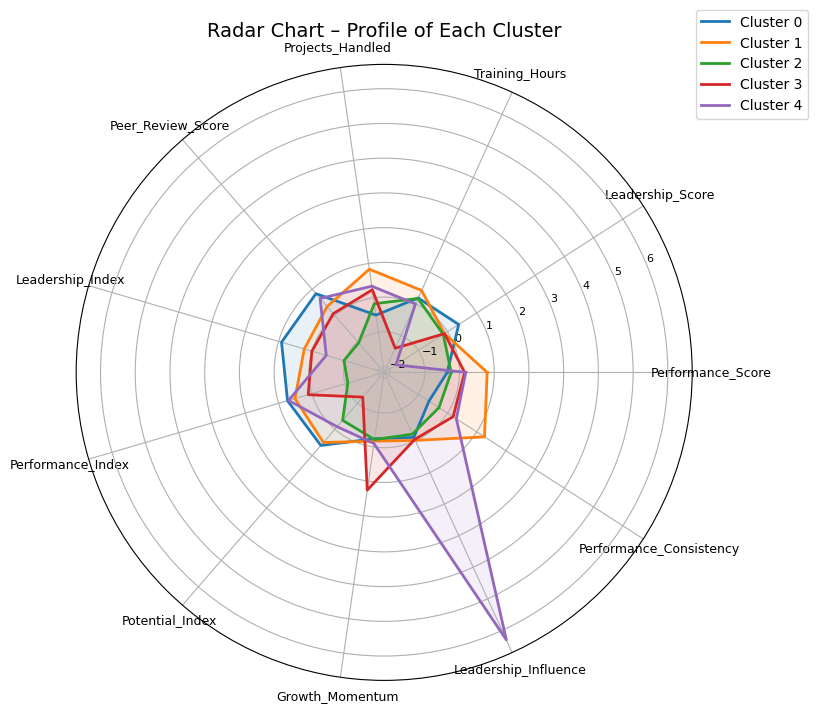

In [ ]:
df_cluster = df_scaled.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature per cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile of Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

### **Selected features**

In [ ]:
df_scaled2 = df_scaled.drop(columns=['Performance_Score', 'Leadership_Score', 'Training_Hours',
                                     'Projects_Handled', 'Growth_Momentum', 'Peer_Review_Score', 'Leadership_Influence', 'Performance_Consistency'])

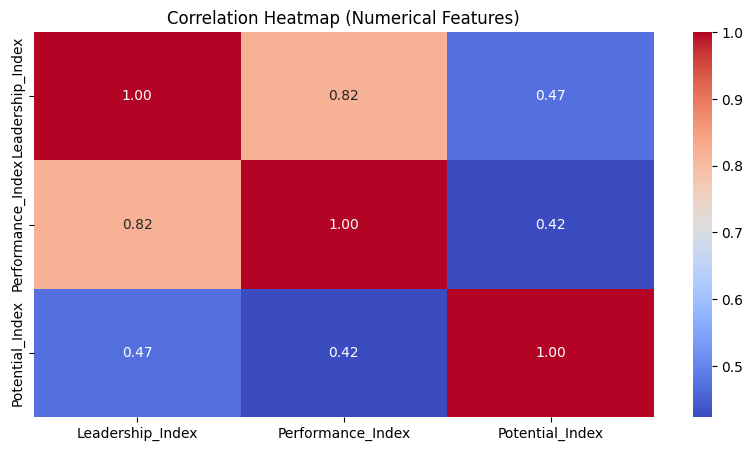

In [ ]:
num_cols = df_scaled2.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 5))
sns.heatmap(df_scaled2[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

#### **Elbow method**

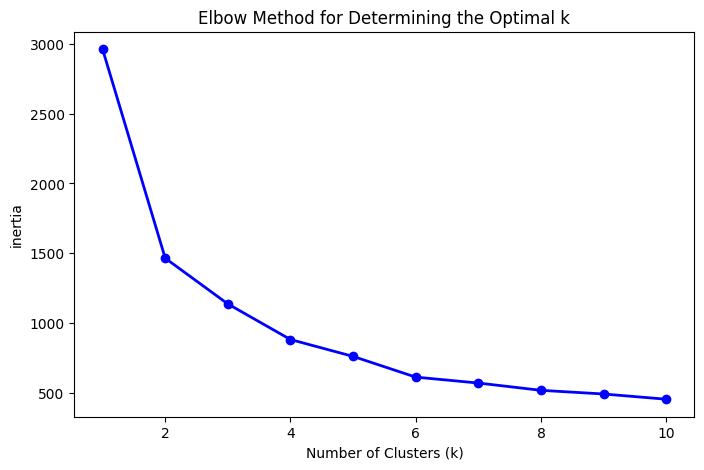

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for Determining the Optimal k')
plt.show()

#### **Silhouette_score and davies_bouldin_score**

In [ ]:
X = df_scaled2.values

In [ ]:
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=500, random_state=42).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    results.append([k, sil, dbi])

df_results = pd.DataFrame(results, columns=['k', 'Silhouette', 'DBI'])
print(df_results)

    k  Silhouette       DBI
0   2    0.407040  0.931791
1   3    0.299720  1.180320
2   4    0.320992  1.000364
3   5    0.312454  1.033581
4   6    0.310237  0.965258
5   7    0.282720  1.039299
6   8    0.271177  1.063737
7   9    0.281358  1.049420
8  10    0.285985  1.054103


In [ ]:
best_sil_k = df_results.loc[df_results['Silhouette'].idxmax(), 'k']
best_dbi_k = df_results.loc[df_results['DBI'].idxmin(), 'k']

print("Best k according to Silhouette =", best_sil_k)
print("Best k according to DBI        =", best_dbi_k)

Best k according to Silhouette = 2
Best k according to DBI        = 2


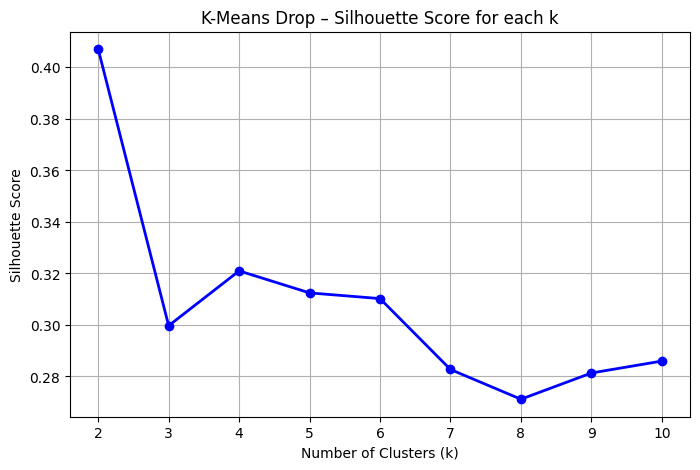

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_results["k"], df_results["Silhouette"], 'bo-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Drop – Silhouette Score for each k")
plt.grid(True)
plt.show()

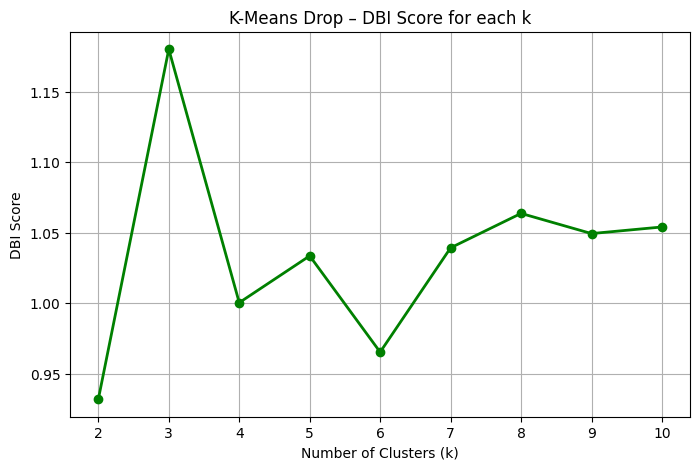

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_results["k"], df_results["DBI"], 'go-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DBI Score")
plt.title("K-Means Drop – DBI Score for each k")
plt.grid(True)
plt.show()

#### **Visualization k = 4**

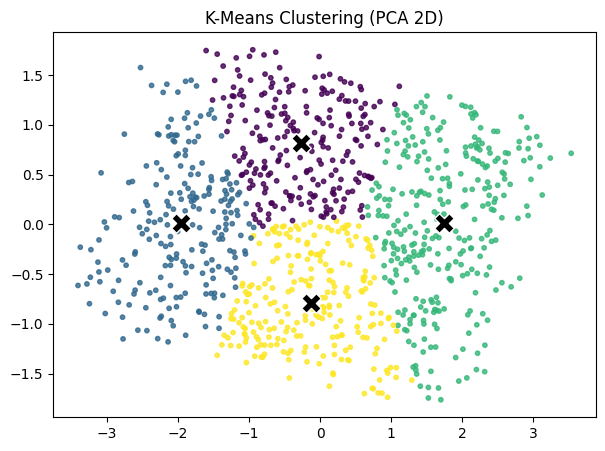

In [ ]:
# X = df_scaled2
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# 1. Fit PCA to data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. Transform centroids to PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 3. Plot data + centroids
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title("K-Means Clustering (PCA 2D)")
plt.show()

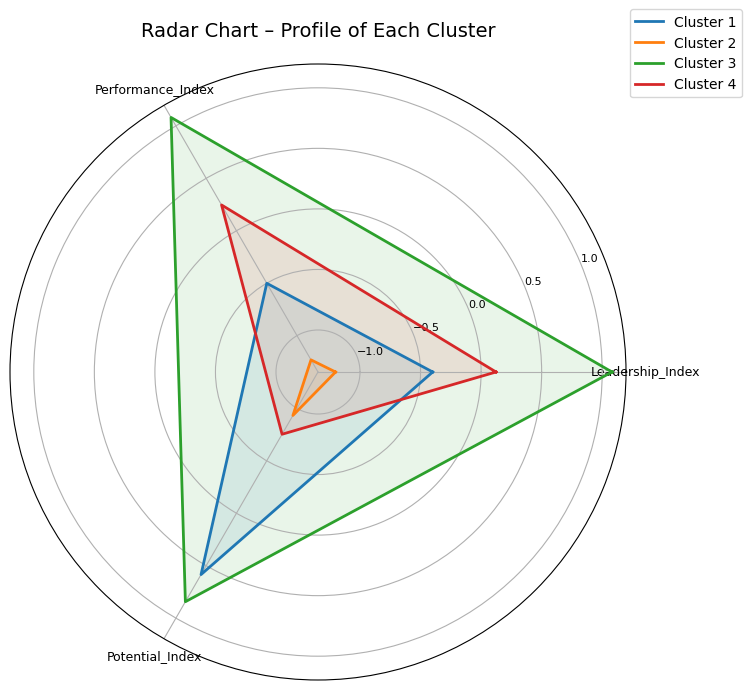

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels + 1

# Calculate the average of each feature per cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile of Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

#### **Visualization k = 5**

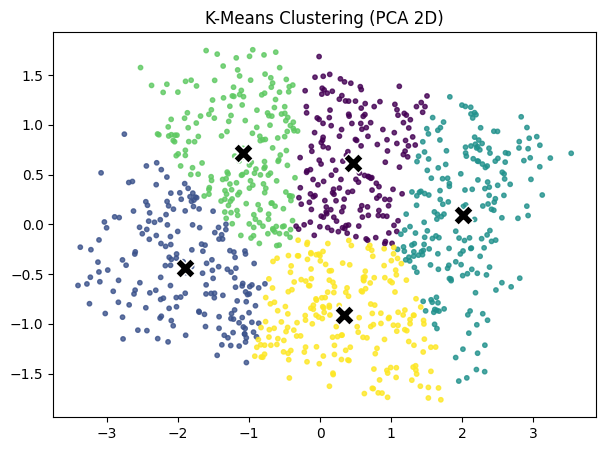

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# 1. Fit PCA to data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. Transform centroids to PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 3. Plot data + centroids
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title("K-Means Clustering (PCA 2D)")
plt.show()

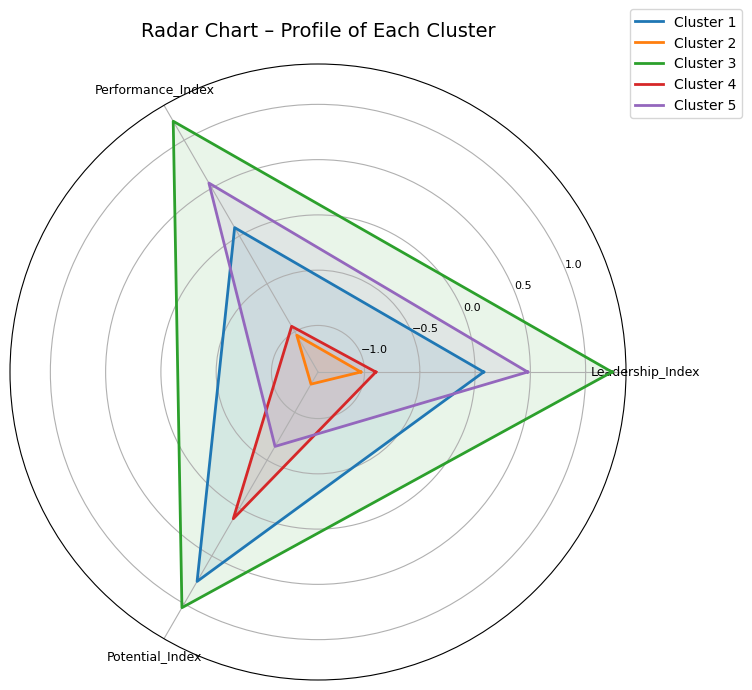

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels + 1

# Calculate the average of each feature per cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile of Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

## **Gaussian mixture model**

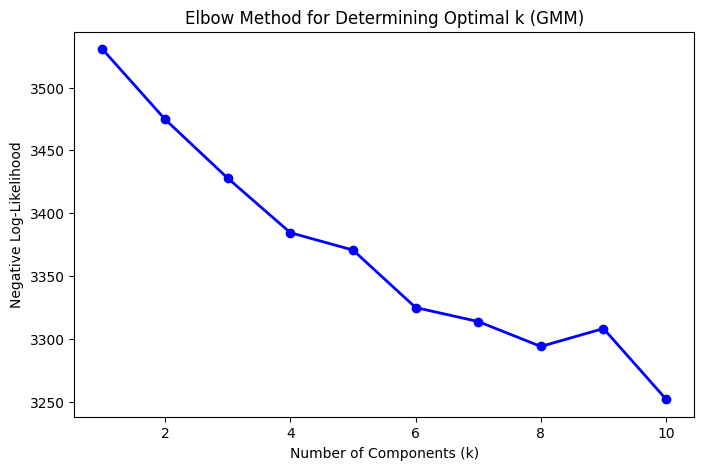

In [ ]:
n_components = range(1, 11)
neg_log_likelihood = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled2)

    # score = average log-likelihood per sample
    # negative log-likelihood = -score * n_samples
    nll = -gmm.score(df_scaled2) * len(df_scaled2)
    neg_log_likelihood.append(nll)

plt.figure(figsize=(8,5))
plt.plot(n_components, neg_log_likelihood, 'bo-', linewidth=2)
plt.xlabel('Number of Components (k)')
plt.ylabel('Negative Log-Likelihood')
plt.title('Elbow Method for Determining Optimal k (GMM)')
plt.show()

#### **Silhouette_score and davies_bouldin_score**

In [ ]:
X_gmm = df_scaled2.values

In [ ]:
results_gmm = []

for k in range(2, 11):
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        n_init=10,
        random_state=42)

    # Fit data to X_gmm
    gmm.fit(X_gmm)

    # Label cluster from GMM
    labels = gmm.predict(X_gmm)

    # Calculate Silhouette and DBI based on X_gmm
    sil = silhouette_score(X_gmm, labels)
    dbi = davies_bouldin_score(X_gmm, labels)

    results_gmm.append([k, sil, dbi])

df_gmm_results = pd.DataFrame(results_gmm, columns=["k", "Silhouette", "DBI"])
print(df_gmm_results)

    k  Silhouette       DBI
0   2    0.378726  0.985545
1   3    0.259586  1.275267
2   4    0.241541  1.222058
3   5    0.247479  1.173847
4   6    0.203150  1.267111
5   7    0.157913  1.344091
6   8    0.168369  1.324435
7   9    0.167572  1.396875
8  10    0.188466  1.327711


In [ ]:
best_sil_k = df_results.loc[df_gmm_results['Silhouette'].idxmax(), 'k']
best_dbi_k = df_results.loc[df_gmm_results['DBI'].idxmin(), 'k']

print("Best k according to Silhouette =", best_sil_k)
print("Best k according to DBI        =", best_dbi_k)

Best k according to Silhouette = 2
Best k according to DBI        = 2


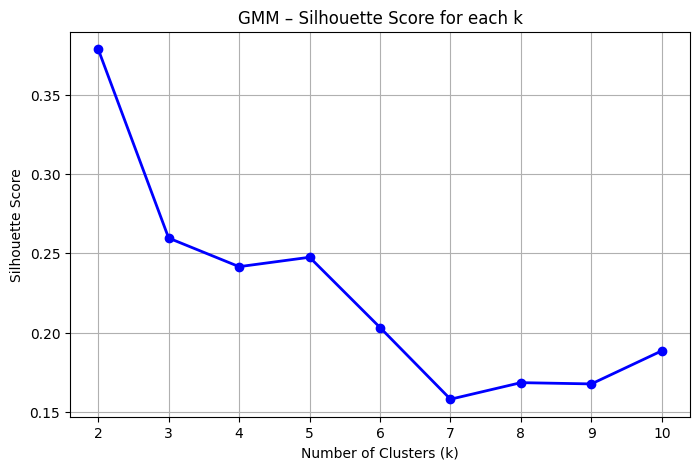

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_gmm_results["k"], df_gmm_results["Silhouette"], 'bo-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("GMM – Silhouette Score for each k")
plt.grid(True)
plt.show()

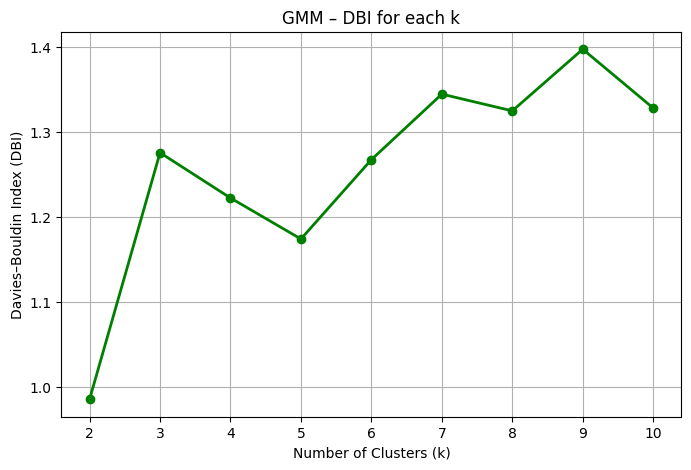

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_gmm_results["k"], df_gmm_results["DBI"], 'go-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies–Bouldin Index (DBI)")
plt.title("GMM – DBI for each k")
plt.grid(True)
plt.show()

#### **Visualization k= 4**

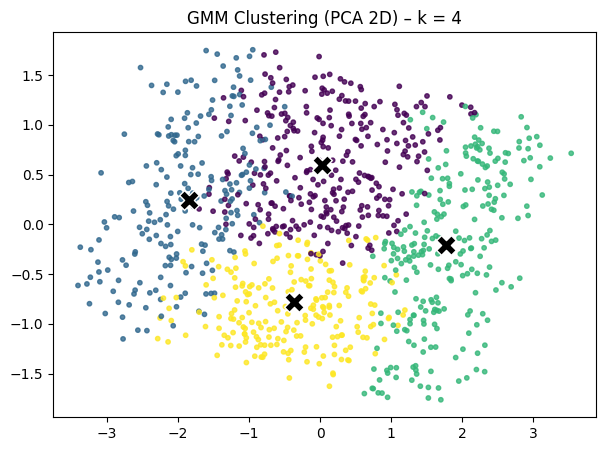

In [ ]:
# Recreate the GMM model for a specific k
gmm_k = GaussianMixture(n_components=4, random_state=42)
gmm_k.fit(X_gmm)
labels = gmm_k.predict(X_gmm)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_gmm)

# Transform cluster means to PCA
means = gmm_k.means_
means_pca = pca.transform(means)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(means_pca[:,0], means_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title(f"GMM Clustering (PCA 2D) – k = {4}")
plt.show()

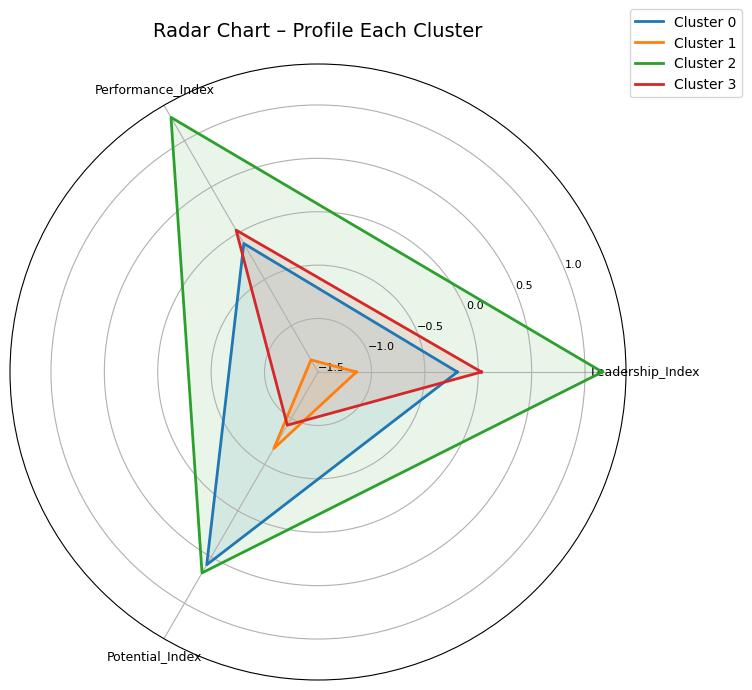

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature for each cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

#### **Visualization k = 5**

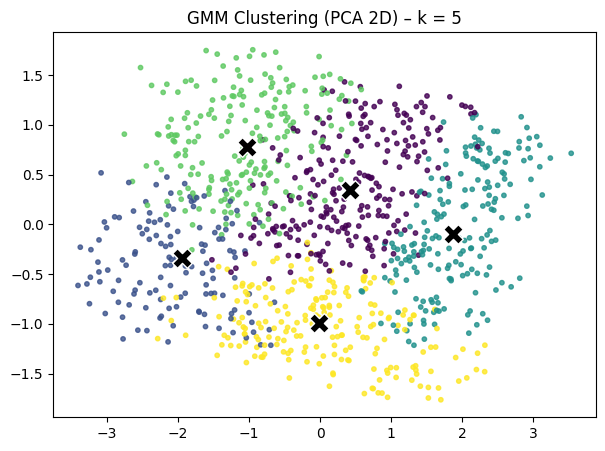

In [ ]:
# Recreate the GMM model for a specific k
gmm_k = GaussianMixture(n_components=5, random_state=42)
gmm_k.fit(X_gmm)
labels = gmm_k.predict(X_gmm)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_gmm)

# Transform cluster means to PCA
means = gmm_k.means_
means_pca = pca.transform(means)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(means_pca[:,0], means_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')
plt.title(f"GMM Clustering (PCA 2D) – k = {5}")
plt.show()

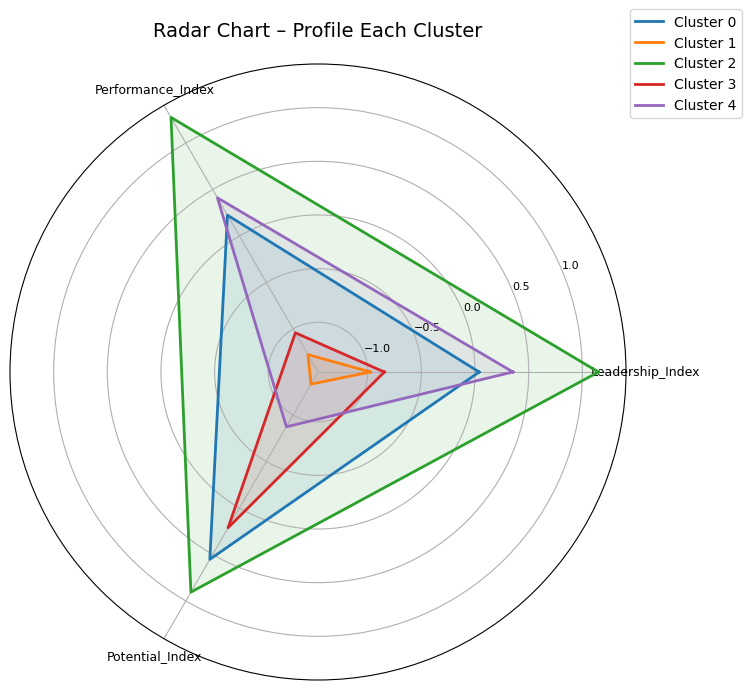

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature for each cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

## **K-medoids**

/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(


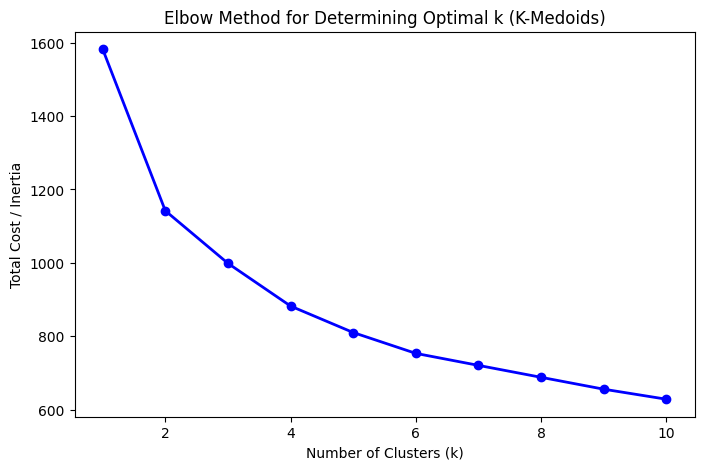

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    kmedoids.fit(df_scaled2)
    inertia.append(kmedoids.inertia_)   # total cost (sum of distances)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Cost / Inertia')
plt.title('Elbow Method for Determining Optimal k (K-Medoids)')
plt.show()

#### **Silhouette_score and davies_bouldin_score**

In [ ]:
X_km = df_scaled2.values

In [ ]:
results_kmedoids = []

for k in range(2, 11):

    # K-Medoids (using ‘pam’ as the default method)
    kmed = KMedoids(
        n_clusters=k,
        metric='euclidean',
        init='k-medoids++',
        random_state=42
    )

    # Fit to data X_gmm
    labels = kmed.fit_predict(X_gmm)

    # Calculate the Silhouette & DBI
    sil = silhouette_score(X_gmm, labels)
    dbi = davies_bouldin_score(X_gmm, labels)

    results_kmedoids.append([k, sil, dbi])

df_kmedoids_results = pd.DataFrame(results_kmedoids, columns=["k", "Silhouette", "DBI"])
print(df_kmedoids_results)

    k  Silhouette       DBI
0   2    0.404823  0.932629
1   3    0.299738  1.166699
2   4    0.269244  1.203232
3   5    0.293064  1.071740
4   6    0.264633  1.169160
5   7    0.271444  1.074950
6   8    0.272696  1.083045
7   9    0.263472  1.150987
8  10    0.265270  1.112114


In [ ]:
best_sil_k = df_results.loc[df_kmedoids_results['Silhouette'].idxmax(), 'k']
best_dbi_k = df_results.loc[df_kmedoids_results['DBI'].idxmin(), 'k']

print("Best k according to Silhouette =", best_sil_k)
print("Best k according to DBI        =", best_dbi_k)

Best k according to Silhouette = 2
Best k according to DBI        = 2


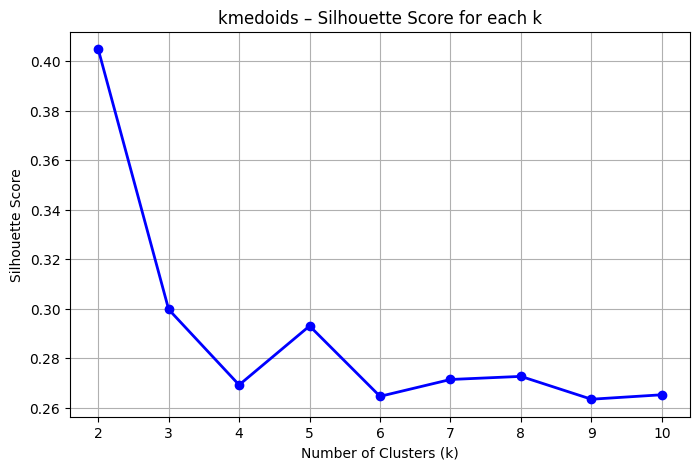

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_kmedoids_results["k"], df_kmedoids_results["Silhouette"], 'bo-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("kmedoids – Silhouette Score for each k")
plt.grid(True)
plt.show()

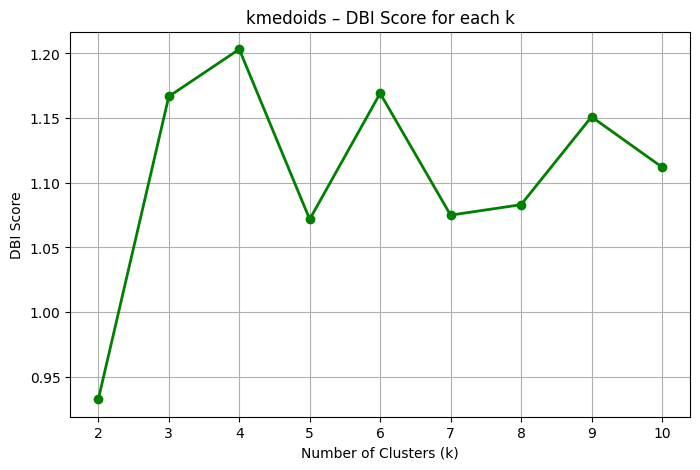

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_kmedoids_results["k"], df_kmedoids_results["DBI"], 'go-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DBI Score")
plt.title("kmedoids – DBI Score for each k")
plt.grid(True)
plt.show()

#### **Visualization k = 4**

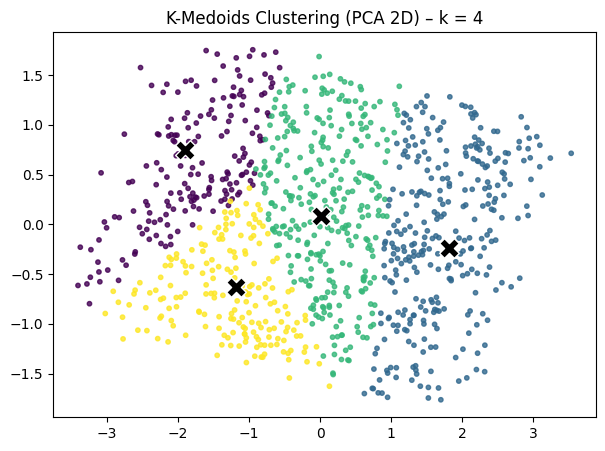

In [ ]:
kmed = KMedoids(n_clusters=4,
    metric='euclidean',
    init='k-medoids++',
    random_state=42
)
labels = kmed.fit_predict(X_gmm)

# Medoid is the representation of the “centroid” of K-Medoids
medoids = kmed.cluster_centers_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_gmm)

# Transform medoids to PCA
medoids_pca = pca.transform(medoids)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(medoids_pca[:,0], medoids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')

plt.title(f"K-Medoids Clustering (PCA 2D) – k = {4}")
plt.show()

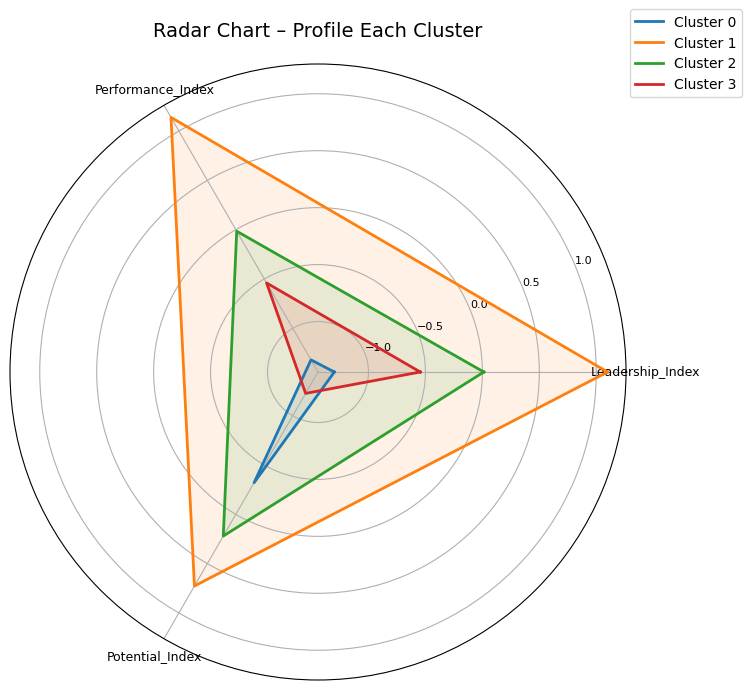

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature for each cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profile Each Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

#### **Visualization k = 5**

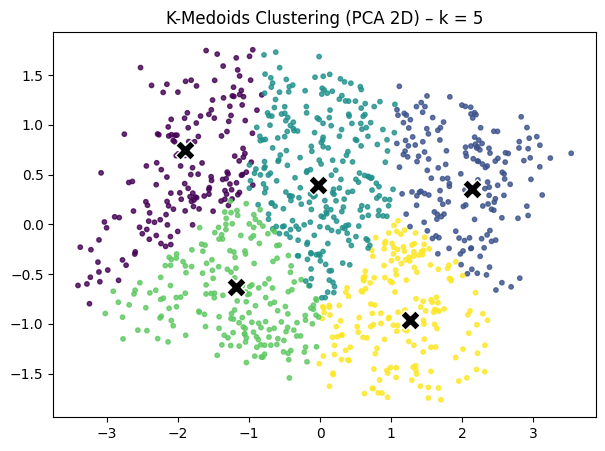

In [ ]:
kmed = KMedoids(n_clusters=5,
    metric='euclidean',
    init='k-medoids++',
    random_state=42
)
labels = kmed.fit_predict(X_gmm)

# Medoid is the representation of the “centroid” of K-Medoids
medoids = kmed.cluster_centers_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_gmm)

# Transform medoids to PCA
medoids_pca = pca.transform(medoids)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=10, alpha=0.8)
plt.scatter(medoids_pca[:,0], medoids_pca[:,1],
            marker='X', s=200, c='black', edgecolor='white')

plt.title(f"K-Medoids Clustering (PCA 2D) – k = {5}")
plt.show()

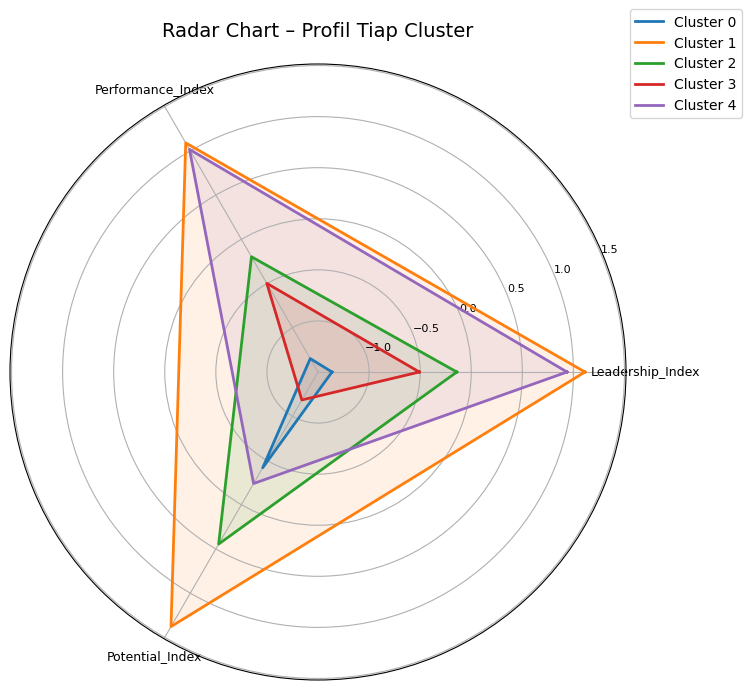

In [ ]:
df_cluster = df_scaled2.copy()
df_cluster['cluster'] = labels

# Calculate the average of each feature for each cluster
cluster_means = df_cluster.groupby('cluster').mean()

# Radar chart
features = cluster_means.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))

for idx in cluster_means.index:
    values = cluster_means.loc[idx].tolist()
    values += values[:1]  # Close the circle

    plt.polar(angles, values, linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], features, fontsize=9)
plt.yticks(fontsize=8)
plt.title('Radar Chart – Profil Tiap Cluster', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

# **MODEL EVALUATION AND CONCLUTION**

**Model Evaluation**
- K-Means: Achieved the highest overall Silhouette Score across K values. Produced consistently lower DBI scores, indicating better-defined and more compact clusters. At K = 4, K-Means showed the strongest balance between cluster separation and cohesion, leading to stable and meaningful cluster structures.
- Gaussian Mixture Model (GMM): Demonstrated lower Silhouette Scores than K-Means across nearly all K values. DBI scores were significantly higher, suggesting loose, less distinct clusters. Cluster boundaries tended to overlap more due to the probabilistic nature of GMM, reducing interpretability.
- K-Medoids: Performed better than GMM but still slightly weaker than K-Means. Silhouette Scores were moderate but did not surpass K-Means for any K. DBI values were acceptable but consistently higher than K-Means, indicating less compact clusters.

**Conclusion**\
Across all tested algorithms, K-Means with K = 4 delivered the most coherent, interpretable, and well-separated clusters. This makes it the most suitable unsupervised method for segmenting employee performance profiles in this dataset.

# **CLUSTERING AND INTERPRETATION**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

In [ ]:
df_kmeans = df_scaled2.copy()
df_kmeans['Cluster'] = labels + 1

cluster_profile = df_kmeans.groupby('Cluster').mean()
cluster_profile

,Leadership_Index,Performance_Index,Potential_Index
Cluster,,,
1,-0.399699,-0.500954,0.584669
2,-1.201940,-1.231246,-0.932604
3,1.080996,1.080395,0.843579
4,0.123062,0.245813,-0.753332


In [ ]:
cluster_counts = df_kmeans['Cluster'].value_counts().sort_index()
print(cluster_counts)

Cluster
1    227
2    219
3    300
4    241
Name: count, dtype: int64


In [ ]:
df_kmeans.head()

,Leadership_Index,Performance_Index,Potential_Index,Cluster
0,0.172393,0.499204,-0.805039,4
1,-1.443855,-1.437583,-1.281323,2
2,0.420284,1.245916,0.233415,3
3,0.043490,-0.002494,-1.296939,4
4,0.509525,0.475869,-0.445875,4


In [ ]:
for col in df_kmeans.columns:
    if col != 'Cluster':
        print(f"=== {col} ===")
        display(df_kmeans.groupby('Cluster')[col].describe())

=== Leadership_Index ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,227.0,-0.399699,0.492593,-1.652083,-0.700182,-0.372966,-0.055666,0.737584
2,219.0,-1.201940,0.532259,-2.405671,-1.582674,-1.186048,-0.764634,-0.115160
3,300.0,1.080996,0.549858,-0.234148,0.648344,1.124294,1.513483,2.284423
4,241.0,0.123062,0.552042,-1.047229,-0.283726,0.132731,0.549187,1.590329


=== Performance_Index ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,227.0,-0.500954,0.572207,-1.775937,-0.924218,-0.515859,-0.043330,0.860893
2,219.0,-1.231246,0.410078,-2.079290,-1.536756,-1.285907,-0.959220,-0.002494
3,300.0,1.080395,0.430921,-0.189172,0.802556,1.117575,1.432595,1.910958
4,241.0,0.245813,0.528832,-0.959220,-0.119168,0.160849,0.557540,1.665942


=== Potential_Index ===


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,227.0,0.584669,0.465934,-0.422451,0.221703,0.592580,0.936129,1.732537
2,219.0,-0.932604,0.653246,-2.319777,-1.421865,-0.875311,-0.430259,0.428613
3,300.0,0.843579,0.750212,-0.797231,0.295879,0.819010,1.484635,2.294708
4,241.0,-0.753332,0.492853,-1.820070,-1.132972,-0.766000,-0.367795,0.256839


In [ ]:
label_map = {
    1: 'Under Developed With Potential',
    2: 'At-Risk and Underpowered',
    3: 'All Around Top Performer',
    4: 'Consistent Performer or Leader'
}

df_kmeans['Characteristics'] = df_kmeans['Cluster'].map(label_map)
df_kmeans.head()

,Leadership_Index,Performance_Index,Potential_Index,Cluster,Characteristics
0,0.172393,0.499204,-0.805039,4,Consistent Performer or Leader
1,-1.443855,-1.437583,-1.281323,2,At-Risk and Underpowered
2,0.420284,1.245916,0.233415,3,All Around Top Performer
3,0.043490,-0.002494,-1.296939,4,Consistent Performer or Leader
4,0.509525,0.475869,-0.445875,4,Consistent Performer or Leader


In [ ]:
label_map = {
    1: 'Talents in this cluster show strong potential, but their leadership and performance are still developing. They can deliver tasks at a moderate level and demonstrate promising future growth, especially when guided with structured coaching. With the right support, they have the capacity to accelerate quickly and transition into more consistent and high-impact contributors.',
    2: 'This cluster has the lowest scores across all indices: performance, leadership, and potential. Individuals in this group often struggle with execution and readiness for future roles. They require foundational skill-building, clearer expectations, and closer supervision. Without timely intervention, they are at higher risk for persistent underperformance or disengagement.',
    3: 'This group demonstrates the highest levels of performance, leadership, and potential. They consistently produce excellent results, adapt quickly, and show strong upward momentum. Cluster 3 members are reliable, proactive, and capable of taking on more strategic responsibilities. They represent the organization’s most promising future leaders and benefit from advanced development opportunities and accelerated pathways.',
    4: 'Talents in this cluster excel in performance and execution quality. They are dependable contributors with solid task delivery and operational strength. However, their leadership and potential indicators are comparatively lower, suggesting they may thrive best in specialist or individual contributor roles. They bring strong value through expertise and consistency, though not necessarily as leadership-track talent.'
}

df_kmeans['Description'] = df_kmeans['Cluster'].map(label_map)
df_kmeans.head()

,Leadership_Index,Performance_Index,Potential_Index,Cluster,Characteristics,Description
0,0.172393,0.499204,-0.805039,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...
1,-1.443855,-1.437583,-1.281323,2,At-Risk and Underpowered,This cluster has the lowest scores across all ...
2,0.420284,1.245916,0.233415,3,All Around Top Performer,This group demonstrates the highest levels of ...
3,0.043490,-0.002494,-1.296939,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...
4,0.509525,0.475869,-0.445875,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...


**Interpretation**
- Cluster 1 — **Under Developed With Potential**\
Talents in this cluster show strong potential, but their leadership and performance are still developing. They can deliver tasks at a moderate level and demonstrate promising future growth, especially when guided with structured coaching. With the right support, they have the capacity to accelerate quickly and transition into more consistent and high-impact contributors.

- Cluster 2 — **At-Risk and Underpowered**\
This cluster has the lowest scores across all indices: performance, leadership, and potential. Individuals in this group often struggle with execution and readiness for future roles. They require foundational skill-building, clearer expectations, and closer supervision. Without timely intervention, they are at higher risk for persistent underperformance or disengagement.

- Cluster 3 — **All Around Top Performer**\
This group demonstrates the highest levels of performance, leadership, and potential. They consistently produce excellent results, adapt quickly, and show strong upward momentum. Cluster 3 members are reliable, proactive, and capable of taking on more strategic responsibilities. They represent the organization’s most promising future leaders and benefit from advanced development opportunities and accelerated pathways.

- Cluster 4 — **Consistent Performer or Leader**\
Talents in this cluster excel in performance and execution quality. They are dependable contributors with solid task delivery and operational strength. However, their leadership and potential indicators are comparatively lower, suggesting they may thrive best in specialist or individual contributor roles. They bring strong value through expertise and consistency, though not necessarily as leadership-track talent.

In [ ]:
label_map = {
    1: 'Strengthen their acceleration potential by designing structured skill-building programs, pairing them with strong mentors, and providing gradual exposure to stretch assignments. Enable clearer pathways to grow their performance and leadership capabilities through guided, hands-on learning.',
    2: 'Implement targeted capability recovery. Simplify task expectations, rebuild core competencies through foundational training, and provide close, supportive coaching. Establish short-cycle performance check-ins to restore confidence and prevent long-term disengagement or turnover.',
    3: 'Fast-track their development by placing them in rotational roles, strategic projects, or cross-functional initiatives. Provide senior-leader sponsorship, succession planning visibility, and opportunities that tap into their high leadership and performance trajectory.',
    4: 'Maximize their contribution through specialist or expert-track development. Assign them to roles requiring high execution reliability, deepen their technical mastery, and offer targeted soft-skill development to gradually strengthen influence. Retain them with recognition, skill growth pathways, and role stability that fits their strengths.'
}

df_kmeans['HR_Recommendations'] = df_kmeans['Cluster'].map(label_map)
df_kmeans.head()

,Leadership_Index,Performance_Index,Potential_Index,Cluster,Characteristics,Description,HR_Recommendations
0,0.172393,0.499204,-0.805039,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...
1,-1.443855,-1.437583,-1.281323,2,At-Risk and Underpowered,This cluster has the lowest scores across all ...,Implement targeted capability recovery. Simpli...
2,0.420284,1.245916,0.233415,3,All Around Top Performer,This group demonstrates the highest levels of ...,Fast-track their development by placing them i...
3,0.043490,-0.002494,-1.296939,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...
4,0.509525,0.475869,-0.445875,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...


In [ ]:
label_map = {
    1: 'The right program for this group includes performance improvement training, task management workshops, and feedback-based coaching sessions. HR can give them small, challenging tasks such as becoming a PIC assistant or co-lead on simple projects to build leadership readiness. This approach helps them strengthen their execution while maximizing their already apparent great potential.',
    2: 'This group requires basic interventions such as core competency training, SOP refreshers, and regular coaching. HR also needs to implement individual improvement plans, monthly check-ins, and support programs such as buddy systems to restore motivation and confidence. Performance stability and engagement need to be built early on to prevent them from developing into long-term problems.',
    3: 'Acceleration programs such as rotational assignments, strategic projects, leadership boot camps, and mentorship with senior leaders are highly relevant for this group. They benefit from high-impact opportunities and clear leadership paths. Exposing them to greater roles will increase retention while accelerating their development as future leaders.',
    4: 'HR can support this group through specialist career paths, technical certifications, and assignments that maximize their execution strengths. Soft skills development can be provided incrementally to strengthen collaboration and communication abilities. To retain them, recognition programs, skill-based incentives, and long-term career roadmaps are highly effective, given their vital role in operational stability.',
}

df_kmeans['HR_Programs'] = df_kmeans['Cluster'].map(label_map)
df_kmeans.head()

,Leadership_Index,Performance_Index,Potential_Index,Cluster,Characteristics,Description,HR_Recommendations,HR_Programs
0,0.172393,0.499204,-0.805039,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...
1,-1.443855,-1.437583,-1.281323,2,At-Risk and Underpowered,This cluster has the lowest scores across all ...,Implement targeted capability recovery. Simpli...,This group requires basic interventions such a...
2,0.420284,1.245916,0.233415,3,All Around Top Performer,This group demonstrates the highest levels of ...,Fast-track their development by placing them i...,Acceleration programs such as rotational assig...
3,0.043490,-0.002494,-1.296939,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...
4,0.509525,0.475869,-0.445875,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...


**HR Recommendations and Programs:**\
Cluster 1 — **Under Developed With Potential**\
Recommendation:\
Strengthen their acceleration potential by designing structured skill-building programs, pairing them with strong mentors, and providing gradual exposure to stretch assignments. Enable clearer pathways to grow their performance and leadership capabilities through guided, hands-on learning.\
Recommended Programs:\
The right program for this group includes performance improvement training, task management workshops, and feedback-based coaching sessions. HR can give them small, challenging tasks such as becoming a PIC assistant or co-lead on simple projects to build leadership readiness. This approach helps them strengthen their execution while maximizing their already apparent great potential.


Cluster 2 — **At-Risk and Underpowered**\
Recommendation:\
Implement targeted capability recovery. Simplify task expectations, rebuild core competencies through foundational training, and provide close, supportive coaching. Establish short-cycle performance check-ins to restore confidence and prevent long-term disengagement or turnover.\
Recommended Programs:\
This group requires basic interventions such as core competency training, SOP refreshers, and regular coaching. HR also needs to implement individual improvement plans, monthly check-ins, and support programs such as buddy systems to restore motivation and confidence. Performance stability and engagement need to be built early on to prevent them from developing into long-term problems.

Cluster 3 — **All Around Top Performer**\
Recommendation:\
Fast-track their development by placing them in rotational roles, strategic projects, or cross-functional initiatives. Provide senior-leader sponsorship, succession planning visibility, and opportunities that tap into their high leadership and performance trajectory.\
Recommended Programs:\
Acceleration programs such as rotational assignments, strategic projects, leadership boot camps, and mentorship with senior leaders are highly relevant for this group. They benefit from high-impact opportunities and clear leadership paths. Exposing them to greater roles will increase retention while accelerating their development as future leaders.

Cluster 4 — **Consistent Performer or Leader**\
Recommendation:\
Maximize their contribution through specialist or expert-track development. Assign them to roles requiring high execution reliability, deepen their technical mastery, and offer targeted soft-skill development to gradually strengthen influence. Retain them with recognition, skill growth pathways, and role stability that fits their strengths.\
Recommended Programs:\
HR can support this group through specialist career paths, technical certifications, and assignments that maximize their execution strengths. Soft skills development can be provided incrementally to strengthen collaboration and communication abilities. To retain them, recognition programs, skill-based incentives, and long-term career roadmaps are highly effective, given their vital role in operational stability.

#**MODEL SELECTION SUMMARY**

Across all modeling experiments, tree-based models, linear models, and unsupervised clustering, the dataset showed patterns that were more continuous than sharply separable. As a result, most supervised models struggled to produce reliable predictions, even after tuning.\
\
Based on all experiment, the most suitable model for this project is K-Means with K = 4. The reasons are:
1. It produced the most stable, most compact, and most interpretable cluster structure.
2. The resulting 4 clusters align naturally with HR personas, such as Under Developed With Potential, At-Risk and Underpowered, All Around Top Performer, and Consistent Performer or Leader.
3. Metrics showed K-Means was more reliable than K-Medoids and significantly better than GMM.
4. Unlike supervised models, which all struggled due to weak promotion-eligibility signals, clustering captured continuous performance patterns more effectively.

# **PRACTICAL VALUE FOR HR**

K-Means (k = 4) with a Silhouette score of 0.32 and a DBI score of 1.00 provides the most stable segmentation and is easy for HR to understand for decision making.

Clustering gives the dashboard its intelligence by turning raw employee metrics into clear talent segments. Instead of scattered individual data points, HR sees structured groups with distinct strengths and risks. This makes the dashboard easier to interpret, supports targeted decisions, and gives every visualization a meaningful story about the organization’s talent landscape.

In [ ]:
# from google.colab import files
# df_kmeans.to_csv('dataset_clustered_Final.csv', index=False)
# files.download('dataset_clustered_Final.csv')

# **CREATE DATA SET FOR DASHBOARD**

In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/dataset_clean_all.csv')
df_clean.head()

,Employee_ID,Age,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,EMP0001,24.0,2.0,44.0,42.0,19.0,61.0,Junior,0.0,54.2,23.1,50.0,0.441860,1.355556,38.0
1,EMP0002,50.0,5.0,45.0,66.0,11.0,6.0,Junior,0.0,21.6,6.5,37.8,0.164179,0.130435,55.0
2,EMP0003,56.0,5.0,19.0,96.0,6.0,86.0,Lead,0.0,59.2,29.5,76.6,0.061856,4.300000,30.0
3,EMP0004,39.0,4.0,51.0,16.0,6.0,52.0,Senior,0.0,51.6,18.8,37.4,0.352941,1.000000,24.0
4,EMP0005,41.0,4.0,64.0,57.0,16.0,59.0,Junior,0.0,61.0,22.9,59.2,0.275862,0.907692,64.0


In [ ]:
df_clean.shape, df_kmeans.shape

((987, 15), (987, 8))

In [ ]:
# Take the cluster info column
df_cluster = df_kmeans[['Cluster', 'Characteristics', 'Description', 'HR_Recommendations', 'HR_Programs']]
df_clean.drop(columns=['Promotion_Eligible'], inplace=True)

# Reset the second index of the dataframe
df_clean = df_clean.reset_index(drop=True)
df_cluster = df_cluster.reset_index(drop=True)

# Merge
df_merged = pd.concat([df_clean, df_cluster], axis=1)

In [ ]:
df_merged.head()

,Employee_ID,Age,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency,Cluster,Characteristics,Description,HR_Recommendations,HR_Programs
0,EMP0001,24.0,2.0,44.0,42.0,19.0,61.0,Junior,54.2,23.1,50.0,0.441860,1.355556,38.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...
1,EMP0002,50.0,5.0,45.0,66.0,11.0,6.0,Junior,21.6,6.5,37.8,0.164179,0.130435,55.0,2,At-Risk and Underpowered,This cluster has the lowest scores across all ...,Implement targeted capability recovery. Simpli...,This group requires basic interventions such a...
2,EMP0003,56.0,5.0,19.0,96.0,6.0,86.0,Lead,59.2,29.5,76.6,0.061856,4.300000,30.0,3,All Around Top Performer,This group demonstrates the highest levels of ...,Fast-track their development by placing them i...,Acceleration programs such as rotational assig...
3,EMP0004,39.0,4.0,51.0,16.0,6.0,52.0,Senior,51.6,18.8,37.4,0.352941,1.000000,24.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...
4,EMP0005,41.0,4.0,64.0,57.0,16.0,59.0,Junior,61.0,22.9,59.2,0.275862,0.907692,64.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...


In [ ]:
label_map = {
    'Junior': 6500000,
    'Mid': 11500000,
    'Senior': 22500000,
    'Lead': 27500000
}

df_merged['Salary'] = df_merged['Current_Position_Level'].map(label_map)
df_merged.head()

,Employee_ID,Age,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency,Cluster,Characteristics,Description,HR_Recommendations,HR_Programs,Salary
0,EMP0001,24.0,2.0,44.0,42.0,19.0,61.0,Junior,54.2,23.1,50.0,0.441860,1.355556,38.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...,6500000
1,EMP0002,50.0,5.0,45.0,66.0,11.0,6.0,Junior,21.6,6.5,37.8,0.164179,0.130435,55.0,2,At-Risk and Underpowered,This cluster has the lowest scores across all ...,Implement targeted capability recovery. Simpli...,This group requires basic interventions such a...,6500000
2,EMP0003,56.0,5.0,19.0,96.0,6.0,86.0,Lead,59.2,29.5,76.6,0.061856,4.300000,30.0,3,All Around Top Performer,This group demonstrates the highest levels of ...,Fast-track their development by placing them i...,Acceleration programs such as rotational assig...,27500000
3,EMP0004,39.0,4.0,51.0,16.0,6.0,52.0,Senior,51.6,18.8,37.4,0.352941,1.000000,24.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...,22500000
4,EMP0005,41.0,4.0,64.0,57.0,16.0,59.0,Junior,61.0,22.9,59.2,0.275862,0.907692,64.0,4,Consistent Performer or Leader,Talents in this cluster excel in performance a...,Maximize their contribution through specialist...,HR can support this group through specialist c...,6500000


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              987 non-null    object 
 1   Age                      987 non-null    float64
 2   Performance_Score        987 non-null    float64
 3   Leadership_Score         987 non-null    float64
 4   Training_Hours           987 non-null    float64
 5   Projects_Handled         987 non-null    float64
 6   Peer_Review_Score        987 non-null    float64
 7   Current_Position_Level   987 non-null    object 
 8   Leadership_Index         987 non-null    float64
 9   Performance_Index        987 non-null    float64
 10  Potential_Index          987 non-null    float64
 11  Growth_Momentum          987 non-null    float64
 12  Leadership_Influence     987 non-null    float64
 13  Performance_Consistency  987 non-null    float64
 14  Cluster                  9

In [ ]:
# from google.colab import files
# df_merged.to_csv('dataset_clustered_dashboard.csv', index=False)
# files.download('dataset_clustered_dashboard.csv')